In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [23]:
path='C:/Users/dell/Desktop/Project/My project/Project 3-Sales/Sales-Reporting-main/data/'
frame=[]    
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath=path+file
        df1=pd.read_csv(filepath)
        frame.append(df1)
        result=pd.concat(frame)

In [22]:
result.to_csv('C:/Users/dell/Desktop/Project/My project/Project 3-Sales/Sales-Reporting-main/data/AnnualSales.csv',index=False)

In [24]:
data=pd.read_csv('C:/Users/dell/Desktop/Project/My project/Project 3-Sales/Sales-Reporting-main/data/AnnualSales.csv')

In [83]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
 7   Sales             185950 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 12.8+ MB


In [28]:
data['Month']=data['Order Date'].str[0:2]

In [35]:
data['Month'].unique()

array(['01', 'Or', '02', '10', '11', '12', '03', '04', '05', '06', '07',
       '08', '09'], dtype=object)

In [32]:
data=data.dropna(how='all')

In [36]:
data=data[data['Month']!='Or']

### Reporting:

#### 1/ What was the best month for sales? How much was earned that month?

In [39]:
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'])
data['Price Each']=pd.to_numeric(data['Price Each'])

In [41]:
data['Sales']=data['Quantity Ordered']*data['Price Each']

In [44]:
moving_column=data.pop('Sales')

In [45]:
data.insert(4,'Sales',moving_column)

In [59]:
sales_value=data.groupby('Month').sum()['Sales']

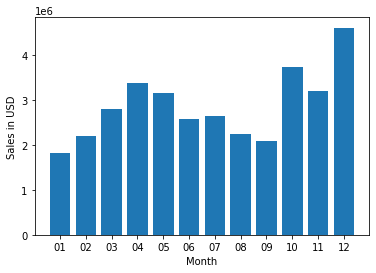

In [63]:
plt.bar(x=sales_value.index,height=sales_value.values)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show();

#### 2: What city has the best sales?

In [65]:
data['City']=data['Purchase Address'].apply(lambda x:x.split(',')[1] )

In [67]:
data['City'].unique()

array([' Boston', ' Portland', ' San Francisco', ' Los Angeles',
       ' Austin', ' Atlanta', ' Seattle', ' New York City', ' Dallas'],
      dtype=object)

In [71]:
city_sale=data.groupby('City').sum()['Sales']

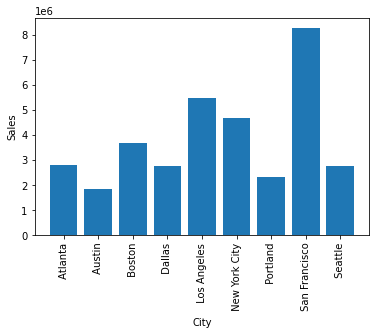

In [74]:
plt.bar(x=city_sale.index,height=city_sale.values)
plt.xticks(city_sale.index,rotation=90)
plt.xlabel('City')
plt.ylabel('Sales')
plt.show();

#### 3: What time should we display ads to maximize the likelihood of customer’s buying product?

In [76]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [77]:
data['Order Date']

0        2019-01-22 21:25:00
1        2019-01-28 14:15:00
2        2019-01-17 13:33:00
3        2019-01-05 20:33:00
4        2019-01-25 11:59:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-09-01 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [82]:
data['Hour']=data['Order Date'].dt.hour

In [91]:
hour_sale=data.groupby('Hour').count()['Sales']

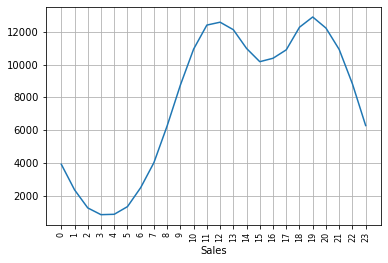

In [92]:
plt.plot(hour_sale.index,hour_sale.values)
plt.grid()
plt.xticks(hour_sale.index,rotation=90,size=8)
plt.xlabel('Hours')
plt.xlabel('Sales')
plt.show();

### 4: What products are most often sold together?

In [101]:
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'])

In [111]:
product_quantity=data.groupby('Product').count()['Quantity Ordered']

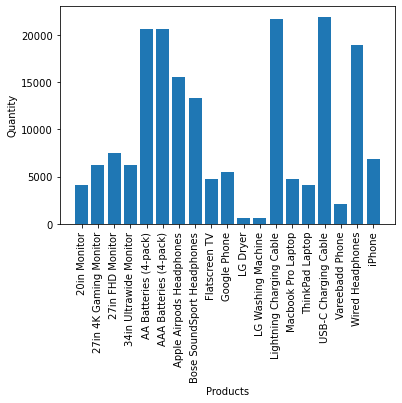

In [112]:
plt.bar(x=product_quantity.index,height=product_quantity.values)
plt.xticks(product_quantity.index,rotation=90)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show();

#### 5: What product sold the most? Why do you think it sold the most?

In [114]:
prices = data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-115-a570ea953557>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prices.index, rotation=90, size=8)


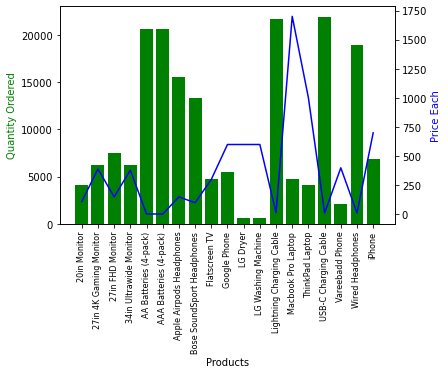

In [115]:
fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(prices.index,product_quantity.values,color='g')
ax2.plot(prices.index,prices.values,'b-')

ax1.set_xticklabels(prices.index, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()